# Hermes Plot
## *insert some description of what we are looking at (from poster)*
### Penn State Berks PHYS_296 Fall 2017 
#### Authors: *Scott Dolan & Zackary Scalyer* 
#### Adviser: *Dr. Alexey  Prokudin*

### Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
# enable plots in the notebook
%matplotlib inline

### reading the data

In [6]:
dat=pd.read_excel('C:/Users/Dolam/Documents/Scott/1000.xlsx');
#dat=pd.read_excel('C:/Users/Tiffany/Documents/Github/PHYS296/dat/expdat/1000.xlsx');

### Calculated values

In [7]:
dat["delta"] = np.sqrt(dat["stat_u"]**2.0) # measurment error
dat["qT"] = dat["pT"]/dat["z"] # transverse momentum
dat["qT2"] = dat["qT"]**2 # square of transverse momentum


### Binning data

In [8]:
# data bin edeges
xBin=np.array([0.023,0.04,0.055,0.075,0.1,0.14,0.2,0.3,0.4,0.6]) # Tick marks figure x-axis
Q2Bin=np.array([1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0, 5.0, 15.0]) # Tick marks figure y-axis
zBin= np.array([0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.1]) # catagories for z to be ploted indiviualy in each subplot
# binning data
dat['xBin'] = pd.cut(dat['x'], xBin,labels = False, retbins=0)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin,labels = False, retbins=0)
dat['zBin'] = pd.cut(dat['z'], zBin,labels = False, retbins=0)

# bins for x and y that have non-empty intersection
pTdatmod=[0,2,3,5,6,8] # xBins that overlap Q2Bins
valuedatmod=[0,2,3,6,8] # Q2bins that overlap xBins

## HermesPlot
### *Reduced matix*

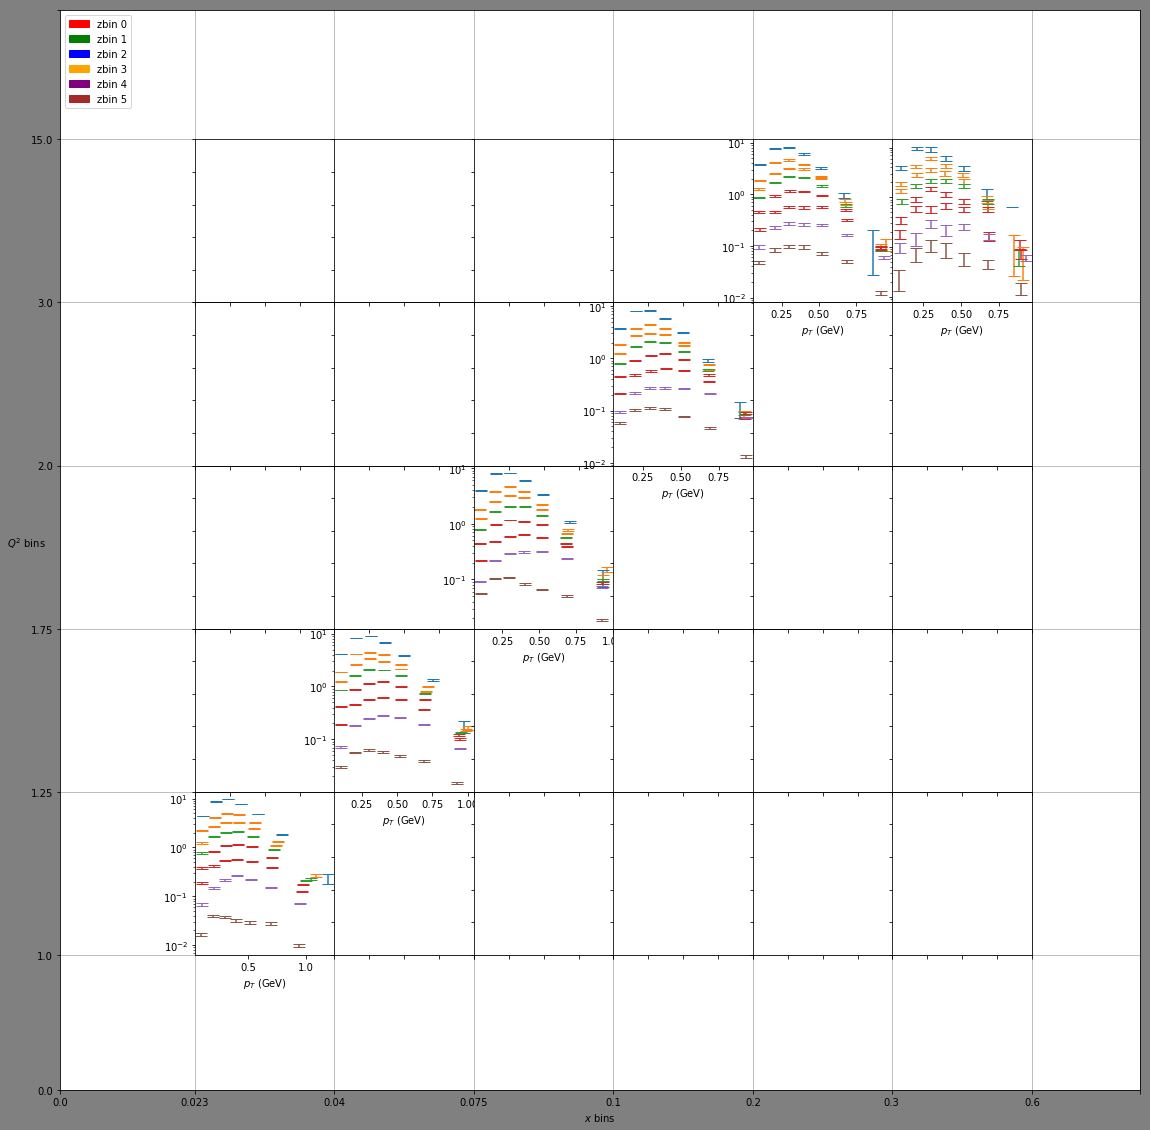

In [9]:
# initialize the figure
fig1=py.figure(figsize=(15, 15),facecolor="gray") # figsize; wxh in inches
globalGrid=gridspec.GridSpec(1, 1, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid=gridspec.GridSpecFromSubplotSpec(5, 6, subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # 5x6 subplot grid 

# figure properties:
ax=fig1.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
ax.yaxis.set_ticks([0,1.25,2.76,4.27,5.78,7.29,8.8,10])
ax.xaxis.set_ticks([0,1.25,2.54,3.83,5.12,6.42,7.7,9,10 ])
#xticklabels = np.array(['','[0,0.023)','[0.04,0.055)','[0.055,0.075)','[0.1,0.14)',
#                            '[0.14,0.1)','[0.4,0.6)'])
#yticklabels = np.array(['','[0,1.0)','[1.25,1.5)','[1.5,1.75)','[2.25,2.5)','[5.0,15.0)'])
xticklabels = np.array([0,0.023,0.04,0.075,0.1,0.2,0.3,0.6]) 
yticklabels = np.array([0,1.0, 1.25, 1.75, 2.0, 3.0, 15.0])
ax.set_yticklabels(yticklabels)
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$ bins",rotation="horizontal")
ax.grid() # grid on

# subplot axis proerties (unused)
Zcolor=["red","green","blue","orange","purple","brown"]
Zmark=["o","o","o","o"]

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='zbin 0')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='zbin 1')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='zbin 2')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='zbin 3')
Zpatch5 = mpatches.Patch(color=Zcolor[4], label='zbin 4')
Zpatch6 = mpatches.Patch(color=Zcolor[5], label='zbin 5')
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4,Zpatch5,Zpatch6],loc='upper left')

num = 0
for f,F in zip(range(len(pTdatmod)),pTdatmod):       
    for j,J in zip(range(len(valuedatmod)),valuedatmod):
        if j == 4:
            k = int(f) # kth possition for subplot on innerGrid matrix
            maskX = dat['xBin'].isin([F]) # retruns boolean for all Jth xBin in dat  
            maskY = dat['Q2Bin'].isin([J]) # retruns boolean for all Fth Q2Bin in dat
        elif j == 3:
            k = 6 + int(f)
            maskX = dat['xBin'].isin([F]) 
            maskY = dat['Q2Bin'].isin([J])
        elif j == 2:
            k = 12 + int(f)
            maskX = dat['xBin'].isin([F]) 
            maskY = dat['Q2Bin'].isin([J])
        elif j == 1:
            k = 18 + int(f)
            maskX = dat['xBin'].isin([F]) 
            maskY = dat['Q2Bin'].isin([J])
        elif j == 0:
            k = 24 + int(f)
            maskX = dat['xBin'].isin([F]) 
            maskY = dat['Q2Bin'].isin([J])
        ax = fig1.add_subplot(innerGrid[k]) # add subplot in innerGrid
        xydat = dat[maskX & maskY] # subset of data for Jth xBin and Fth Q2Bin
        for z in range(len(zBin)-1): 
            maskZ = xydat["zBin"].isin([z])
            databin = xydat[maskZ]
            
            if databin.empty:
                num += 1
                ax.set_yticklabels('')
                ax.set_xticklabels('')
                pass
            else:
#                print('xbin = ' + str(f))
#                print('ybin = ' + str(j))
#                print('k = ' + str(k))
#                print(databin)
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=6,linestyle="")
                if k == 5:
                    ax.set_xlabel(r"$p_T$ (GeV)")
                    ax.set_yscale('log')
                    ax.set_yticklabels("")  
                else:
                    ax.set_yscale("log") 
                    ax.set_xlabel(r"$p_T$ (GeV)")

## Saving figure 
### *to pdf*

In [10]:
pp = PdfPages('mod1000.pdf')
pp.savefig(fig1)
pp.close()                                 
